In [123]:
import wfdb
import scipy
import numpy as np

from matplotlib import pyplot as plt
import math
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

from FeatureExtraction_NB import processing

In [124]:
patient_1 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1])
patient_2 = wfdb.rdrecord('..//01.Dataset/116/s0302lre', channels=[1])
signal_1 = patient_1.p_signal[:, 0]
denoised_signal1,_,_= processing(signal_1)
signal_2 = patient_2.p_signal[:, 0]
denoised_signal2,_,_ = processing(signal_2)

In [125]:
print(len(signal_1))
print(len(signal_2))

115200
115200


In [126]:
type(signal_1[0])

numpy.float64

In [127]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=len(signal))
    
    s1=Auto_corr[:1100]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[:100]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components

In [128]:
type(denoised_signal1[0])

numpy.float64

In [129]:
arr_components1 = nonFiducial(denoised_signal1)

arr_components2 = nonFiducial(denoised_signal2.tolist())

arr_components = arr_components1 + arr_components2

feature1 =  arr_components1[4]

print(len(feature1))

100


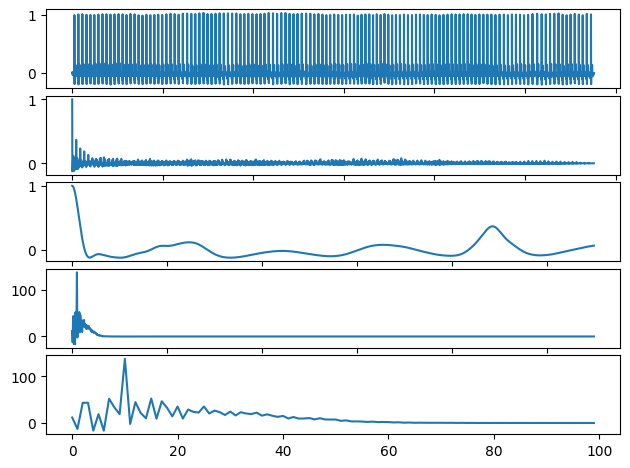

In [130]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(arr_components1[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

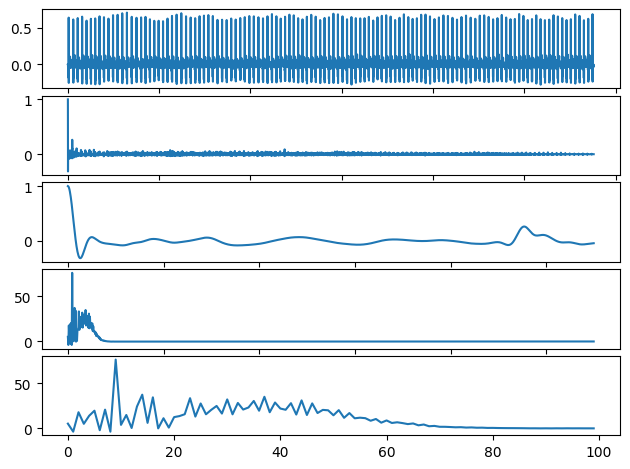

In [131]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(arr_components2[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

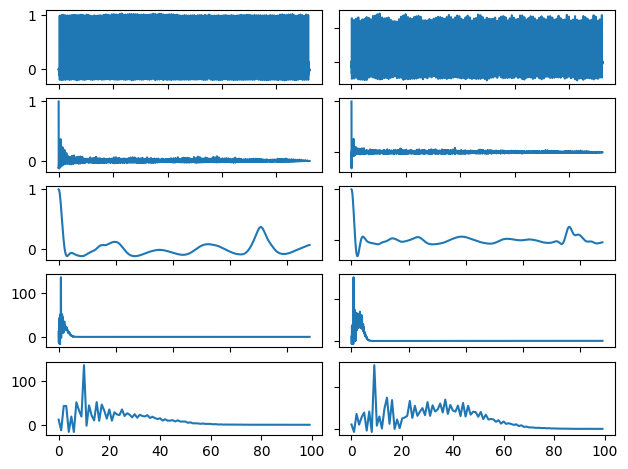

In [132]:
fig , ax = plt.subplots(5,2)

row= 0 
col = 0
count =0
for i in range(0,10):
    ax[row,col].plot(arr_components[i])
    ax[row,col].set_title("")
    count+=1 
    row+=1
    if(count%5 == 0):
        col+=1
        row=0
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0.5,w_pad=0.5)

# Training and Testing

In [184]:
fs = 1000
# best start = 1300, best end = 3200
patient_1 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1])
patient_2 = wfdb.rdrecord('..//01.Dataset/116/s0302lre', channels=[1])
patient_3 = wfdb.rdrecord('..//01.Dataset/105/s0303lre', channels=[1])
patient_4 = wfdb.rdrecord('..//01.Dataset/104/s0306lre', channels=[1])
patient_5 = wfdb.rdrecord('..//01.Dataset/122/s0312lre', channels=[1])
patient_6 = wfdb.rdrecord('..//01.Dataset/150/s0287lre', channels=[1])

signal_1,_,_ = processing(patient_1.p_signal[: ,0])
signal_2 ,_,_= processing(patient_2.p_signal[:, 0])
signal_3 ,_,_= processing(patient_3.p_signal[:, 0])
signal_4,_,_ = processing(patient_4.p_signal[:, 0])
signal_5 ,_,_= processing(patient_5.p_signal[:, 0])
signal_6 ,_,_= processing(patient_6.p_signal[:, 0])


time = len(signal_1)/ fs


In [185]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=len(signal))
    
    s1=Auto_corr[:1100]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[:100]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components[4]

In [187]:
cmp1 = nonFiducial(signal_1).reshape(100,1)
cmp2 = nonFiducial(signal_2).reshape(100,1)
cmp3 = nonFiducial(signal_3).reshape(100,1)
cmp4 = nonFiducial(signal_4).reshape(100,1)
cmp5 = nonFiducial(signal_5).reshape(100,1)
cmp6 = nonFiducial(signal_6).reshape(100,1)

In [149]:
import pandas as pd

In [169]:
Data = np.concatenate((cmp1, cmp2), axis=1)
Data = np.concatenate((Data, cmp3), axis=1)
Data = np.concatenate((Data, cmp4), axis=1)

In [170]:
labels = ['117', '116', '105', '104']

In [171]:
Data = Data.T

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression(random_state=0).fit(Data, labels)

# Make predictions on the test set
y_pred = lr.predict(Data)

# Calculate accuracy
accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [188]:
y_pred = lr.predict(cmp6.T)
y_pred

array(['117'], dtype='<U3')

In [189]:
y_pred = lr.predict_proba(cmp6.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.01
0.0
0.0
0.989
---------------


In [175]:
y_pred = lr.predict(cmp5.T)
y_pred

array(['117'], dtype='<U3')

In [176]:
y_pred = lr.predict_proba(cmp1.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.0
0.0
0.0
1.0
---------------


In [181]:
y_pred = lr.predict(cmp1.T)
y_pred

array(['117'], dtype='<U3')

In [177]:
y_pred = lr.predict_proba(cmp5.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.013
0.0
0.003
0.984
---------------


In [178]:
y_pred = lr.predict_proba(cmp4.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

1.0
0.0
0.0
0.0
---------------


In [179]:
y_pred = lr.predict_proba(cmp3.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.0
1.0
0.0
0.0
---------------


In [180]:
y_pred = lr.predict_proba(cmp2.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.0
0.0
1.0
0.0
---------------
